# Algoritmo PanTompkins
Algoritmo implementado para detectar a ocorrência do pico QRS em um sinal ECG. Foi desenvolvido por Jiapu Pan e Willis J. Tompkins em 1985 e publicado no journal "IEEE Transactions on Biomedical Engineering".
<br>
<p align="center">
<img src="pantompkins.png" height="250" width="800">
</p>

In [1]:
import numpy as np
import wfdb
import matplotlib.pyplot as plt

## Carregar o sinal

O sinal utiliziado nesse notebook foi na frequência de 1kHz, diferente do original de 200Hz.

In [28]:
record, fields = wfdb.rdsamp("database_part/s0004_re", channels=[0])

In [79]:
display(fields)

{'fs': 1000,
 'sig_len': 38400,
 'n_sig': 1,
 'base_date': None,
 'base_time': None,
 'units': ['mV'],
 'sig_name': ['i'],
 'comments': ['age: 79',
  'sex: female',
  'ECG date: 14/08/1990',
  'Diagnose:',
  'Reason for admission: Myocardial infarction',
  'Acute infarction (localization): infero-postero-lateral',
  'Former infarction (localization): no',
  'Additional diagnoses: Diabetes mellitus',
  'Smoker: no',
  'Number of coronary vessels involved: 1',
  'Infarction date (acute): 10-Aug-90',
  'Previous infarction (1) date: n/a',
  'Previous infarction (2) date: n/a',
  'Hemodynamics:',
  'Catheterization date: n/a',
  'Ventriculography: n/a',
  'Chest X-ray: n/a',
  'Peripheral blood Pressure (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (syst/diast): n/a',
  'Pulmonary artery pressure (at rest) (mean): n/a',
  'Pulmonary capillary wedge pressure (at rest): n/a',
  'Cardiac output (at rest): n/a',
  'Cardiac index (at rest): n/a',
  'Stroke volume index (at rest): n

Plotar os dados

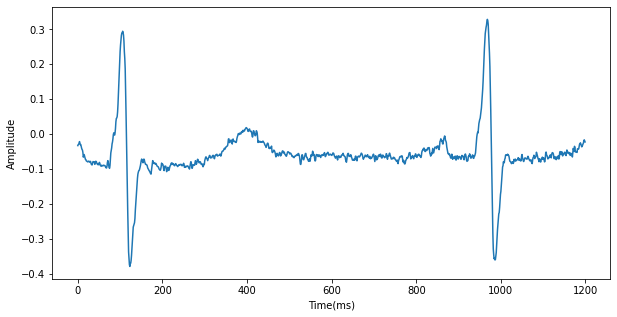

In [7]:
tamanho = np.linspace(0, len(record), num = len(record))
plt.figure(figsize=(10,5))
plt.xlabel(xlabel="Time(ms)")
plt.ylabel(ylabel="Amplitude")
plt.plot(tamanho[0:1200], record[0:1200])

## Filtro Passa Faixa
De acordo com o artigo de Pan, J., & Tompkins, deseja-se um filtro passa faixa entre 5 e 15 Hz. Isso porque é onde maximiza a energia do intervalo QRS.

### Filtro Passa Baixa

Função de transferência do filtro passa baixa:
<br>

$$H(z) = \frac{1}{32}\frac{(1 - z^{-6})^2}{(1 - z^{-1})^2}$$
<br>

Equação da diferença:
$$y(n) = 2y(n - 1) - y(n - 2) + \frac{1}{32}[x(n) - 2x(n - 6) + x(n - 12)]$$

In [8]:
type(record)

numpy.ndarray

In [25]:
def pass_baixa(sinal):
    lowpass = np.zeros(len(sinal)+1)
    for i in range(12, len(lowpass)-2):
        lowpass[i] = 2*lowpass[i+1] - lowpass[i-2] + (1/32*(sinal[i] - 2*sinal[i-6] + sinal[i-12]))
    return lowpass 


In [27]:
teste_passab = pass_baixa(record)
plt.figure(figsize=(10,5))
plt.xlabel(xlabel="Time(ms)")
plt.ylabel(ylabel="Amplitude")
plt.plot(tamanho[0:1200], teste_passab[0:1200])

TypeError: object of type 'numpy.float64' has no len()